In [1]:
try:
  import pandas as pd
  import matplotlib.pyplot as plt

except Exception as e:
  print(f'Installing packages: {e}')
  !pip install pandas matplotlib

In [6]:
col_names = ['date','country/region','new_cases','new_deaths','total_cases','total_deaths','total_recovery']
day1 = pd.read_csv('./data/jordan1.csv', names=col_names)
day2 = pd.read_csv('./data/jordan2.csv', names=col_names)
day3 = pd.read_csv('./data/jordan3.csv', names=col_names)
day4 = pd.read_csv('./data/jordan4.csv', names=col_names)
day5 = pd.read_csv('./data/jordan5.csv', names=col_names)
day6 = pd.read_csv('./data/jordan6.csv', names=col_names)
day7 = pd.read_csv('./data/jordan7.csv', names=col_names)
day8 = pd.read_csv('./data/jordan8.csv', names=col_names)

In [7]:
data = pd.concat([day1,day2,day3,day4,day5,day6,day7,day8])
data.to_csv('./data/gen.csv', index=False)

In [8]:
genData = pd.read_csv('data/gen.csv')

genData['new_cases'] = genData['new_cases'].str.replace(r'\W', '', regex=True).astype('int')
genData['new_deaths'] = genData['new_deaths'].replace(r'\W', '', regex=True).astype('int')
genData['total_cases'] = genData['total_cases'].str.replace(r'\W', '', regex=True).astype('int')
genData['total_deaths'] = genData['total_deaths'].str.replace(r'\W', '', regex=True).astype('int')
genData['total_recovery'] = genData['total_recovery'].str.replace(r'\W', '', regex=True).astype('int')

genData

,date,country/region,new_cases,new_deaths,total_cases,total_deaths,total_recovery
0,2021-3-20,Jordan,5205,87,526666,5788,426754
1,2021-3-21,Jordan,8789,88,535455,5876,434167
2,2021-3-22,Jordan,9269,109,544724,5985,441239
3,2021-3-23,Jordan,9003,92,553727,6077,447888
4,2021-3-24,Jordan,9130,104,562857,6181,456188
5,2021-3-25,Jordan,8433,96,571290,6277,463893
6,2021-3-26,Jordan,6444,97,577734,6374,468037
7,2021-3-27,Jordan,4399,98,582133,6472,476090


In [9]:
genData.isna().sum()

date              0
country/region    0
new_cases         0
new_deaths        0
total_cases       0
total_deaths      0
total_recovery    0
dtype: int64

In [10]:
genData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            8 non-null      object
 1   country/region  8 non-null      object
 2   new_cases       8 non-null      int64 
 3   new_deaths      8 non-null      int64 
 4   total_cases     8 non-null      int64 
 5   total_deaths    8 non-null      int64 
 6   total_recovery  8 non-null      int64 
dtypes: int64(5), object(2)
memory usage: 576.0+ bytes


In [11]:
graphD = genData.set_index('date')

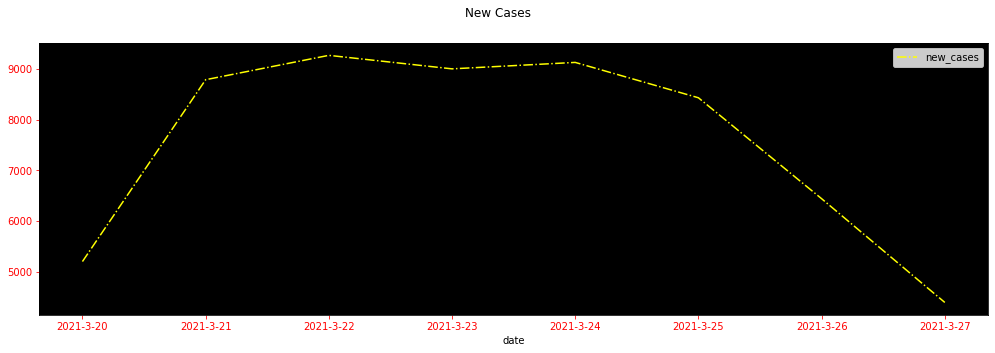

In [13]:
graphData = graphD.loc['2021-3-20' :'2021-3-27'][['new_cases']].plot(color=['yellow'],kind='line',figsize=(17,5), linestyle='-.')
graphData.tick_params(axis='x', colors='red')
graphData.tick_params(axis='y', colors='red')
graphData.set_facecolor('black')
plt.suptitle('New Cases')
plt.show()

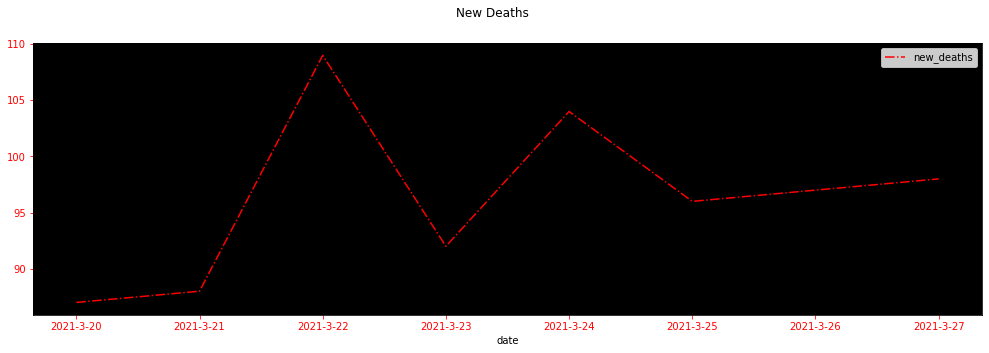

In [14]:
graphData = graphD.loc['2021-3-20' :'2021-3-27'][['new_deaths']].plot(color=['red'],kind='line',figsize=(17,5), linestyle='-.')
graphData.tick_params(axis='x', colors='red')
graphData.tick_params(axis='y', colors='red')
graphData.set_facecolor('black')
plt.suptitle('New Deaths')
plt.show()

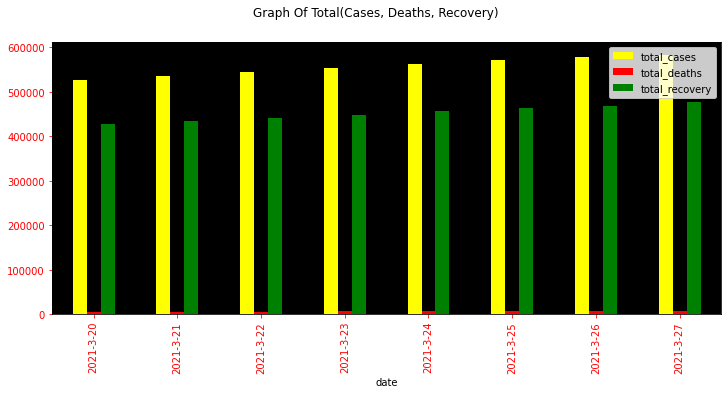

In [15]:
graphData = graphD.loc['2021-3-20' :'2021-3-27'][['total_cases','total_deaths','total_recovery']].plot(color=['yellow','red','green'],kind='bar',figsize=(12,5), linestyle='-.')
graphData.tick_params(axis='x', colors='red')
graphData.tick_params(axis='y', colors='red')
graphData.set_facecolor('black')
plt.suptitle('Graph Of Total(Cases, Deaths, Recovery)')
plt.show()